---
# **1. Installation**
---

In [1]:
!pip install nltk
!pip install --upgrade git+https://github.com/flairNLP/flair.git
!pip install textblob
!pip install stanza
!pip install spacy

  Cloning https://github.com/flairNLP/flair.git to /tmp/pip-req-build-p5mepk31
  Running command git clone -q https://github.com/flairNLP/flair.git /tmp/pip-req-build-p5mepk31
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for flair: filename=flair-0.6.0.post1-cp36-none-any.whl size=187822 sha256=d9afd864d262d90351c464c8a46da03d01d9aa2f9beae6eec9565e07757d8f3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-43sqjm4w/wheels/84/82/73/d2b3b59b7be74ea05f2c6d64132efe27df52daffb47d1dc7bb
Successfully built flair
  Found existing installation: flair 0.6.0.post1
    Uninstalling flair-0.6.0.post1:
      Successfully uninstalled flair-0.6.0.post1


---
# **2. Imports**
---

### i. core

In [2]:
import re
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ii. NLTK Vader Sentiment Intensity Analyzer

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### iii. Stanza

In [4]:
import stanza
stanza.download('en', package='ewt', processors='tokenize,sentiment', verbose=True)
stanza.download('en', package='default', processors='tokenize,sentiment', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,sentiment', lang='en', use_gpu=True)

2020-09-04 08:21:51 WARNING: Can not find sentiment: ewt from official model list. Ignoring it.
2020-09-04 08:21:51 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |

2020-09-04 08:21:51 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-09-04 08:21:51 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-09-04 08:21:51 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |
| pretrain  | ewt     |

2020-09-04 08:21:51 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-09-04 08:21:51 INFO: File exists: /root/stanza_resources/en/sentiment/sstplus.pt.
2020-09-04 08:21:51 INFO: File exists: /root/stanza_resources/en/pretrain/ewt.pt.
2020-09-04 08:21:51 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-09

### iv. Spacy Text Categorizer

In [5]:
import random
import spacy
from spacy.util import minibatch
from spacy.pipeline import TextCategorizer
spacy.prefer_gpu()

TRAIN_DATA = [
    ["My little kitty is so special", {"Cat": True}],
    ["Dude, Totally, Yeah, Video Games", {"Cat": False}],
    ["Should I pay $1,000 for the iPhone X?", {"Cat": False}],
    ["The iPhone 8 reviews are here", {"Cat": False}],
    ["Noa is a great cat name.", {"Cat": True}],
    ["We got a new kitten!", {"Cat": True}]
]

nlp = spacy.load("en_core_web_sm")
category = nlp.create_pipe("textcat", config={"exclusive_classes": True})
nlp.add_pipe(category)

# add label to text classifier
category.add_label("Cat")
category.add_label('False')

optimizer = nlp.begin_training()
losses = {}

for i in range(100):
    random.shuffle(TRAIN_DATA)

    for batch in minibatch(TRAIN_DATA, size=8):
        texts = [nlp(text) for text, entities in batch]
        annotations = [{"cats": entities} for text, entities in batch]
        nlp.update(texts, annotations, sgd=optimizer, losses=losses)
    print(i, losses)

0 {'parser': 0.0, 'textcat': 0.0069444444961845875, 'ner': 0.0, 'tagger': 0.4249240756034851}
1 {'parser': 0.0, 'textcat': 0.013880369253456593, 'ner': 0.0, 'tagger': 0.4284002557396889}
2 {'parser': 0.0, 'textcat': 0.020715977530926466, 'ner': 0.0, 'tagger': 0.4284789737503161}
3 {'parser': 0.0, 'textcat': 0.027338236570358276, 'ner': 0.0, 'tagger': 0.42848583118393435}
4 {'parser': 0.0, 'textcat': 0.03366408636793494, 'ner': 0.0, 'tagger': 0.4284891048876034}
5 {'parser': 0.0, 'textcat': 0.039630088955163956, 'ner': 0.0, 'tagger': 0.428492097505341}
6 {'parser': 0.0, 'textcat': 0.04517432441934943, 'ner': 0.0, 'tagger': 0.42849479447409067}
7 {'parser': 0.0, 'textcat': 0.05026110028848052, 'ner': 0.0, 'tagger': 0.42849676086234467}
8 {'parser': 0.0, 'textcat': 0.054859704338014126, 'ner': 0.0, 'tagger': 0.42849795606741736}
9 {'parser': 0.0, 'textcat': 0.05896327132359147, 'ner': 0.0, 'tagger': 0.4284986168765954}
10 {'parser': 0.0, 'textcat': 0.06257496611215174, 'ner': 0.0, 'tagger

In [6]:
doc = nlp(u'This is my cat called kittens the kitty')
print(doc.cats)

{'Cat': 0.983106255531311, 'False': 0.016893748193979263}


In [7]:
TRAIN_DATA = [
    ("beef", {"cats": {"POSITIVE": 1.0, "NEGATIVE": 0.0}}),
    ("apple", {"cats": {"POSITIVE": 0, "NEGATIVE": 1}})
]

In [8]:
otro = nlp(u"Dude, Totally, Yeah, Video Games")
print(otro.cats)

{'Cat': 9.196160681312904e-05, 'False': 0.9999079704284668}


### v. TextBlob

In [9]:
from textblob import TextBlob

### vi. Flair

In [10]:
import flair
flair_sent = flair.models.TextClassifier.load('en-sentiment')

2020-09-04 08:22:14,877 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


---
# **3. Defining functions**
---

In [11]:
def siaVader_compound(text):
    scores = SIA.polarity_scores(text)
    
    comp_score = scores['compound']
    if comp_score >= 0.05:
        str_comp = 'pos'
    elif comp_score <= -0.05:
        str_comp = 'neg'
    else: # (compound score > -0.05) and (compound score < 0.05)
        str_comp = 'neu'
    return str_comp

def siaVader_maxScore(text):
    scores = SIA.polarity_scores(text)
    
    del scores['compound']
    index = np.argmax(list(scores.values()))
    vader_MaxScore = list(scores.values())[index]
    vader_label = list(scores)[index]
    
    return vader_label

###
def siaVader_byWord(text):
    c = 0
    for n, y in enumerate(text):
        x = SIA.polarity_scores(y)
        if x['compound'] != 0.0:
            c += 1
            # print('{}. {} {}'.format(c, x, y))
            return 'pos' if x > 0.05 else 'neg'

In [12]:
def text_blob_subjective(text):
    return TextBlob(text).sentiment

In [13]:
def flair_lstm(text):
    x = flair.data.Sentence(text)
    flair_sent.predict(sentences=x)
    return x.labels

In [14]:
def stanza_funct(text):
    try:
        data = stNLP(text)
        for sentence in data.sentences:
            return sentence.sentiment
    except:
        print('{...}', end='; ')

---

# **4. Comparing Sentiment Analyzers**

---

### **data (text)**

In [15]:
data = [
        'not confident',
        'unsure',
        'does not handles pressure',
        'disordered',
        'talks too much',
        'uninsterested',
        'sad',
        'unfriendly',
        
        'confident',
        'certain',
        'handles pressure',
        'organized',
        'concise',
        'interested',
        'happy',
        'friendly'
        ]     

In [16]:
#data = "I'm confident of myself but sometimes I'm unsure and unfriendly however I'm concise when I'm interested in being someone organizated who handles pressure"
#data = data.split()

### **NLTK Vader**
* VADER, has different ratings depending on the form of the word and therefore the input should not be stemmed or lemmatized.

* disadvantage of this approach is that Out of Vocab (OOV) words that the sentiment analysis tool has not seen before will not be classified as positive/negative (e.g. typos).

In [17]:
SIA.polarity_scores(' '.join(data))

{'compound': 0.6553, 'neg': 0.271, 'neu': 0.299, 'pos': 0.43}

In [18]:
print(data)
print([(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
[-0.3875, -0.25, 0.2235, 0.0, 0.0, 0.0, -0.4767, -0.3612, 0.4939, 0.2732, -0.296, 0.0, 0.0, 0.4019, 0.5719, 0.4939]


In [19]:
siaVader_compound(' '.join(data))

'pos'

In [20]:
print(data)
print([(lambda x: siaVader_compound(x))(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
['neg', 'neg', 'pos', 'neu', 'neu', 'neu', 'neg', 'neg', 'pos', 'pos', 'neg', 'neu', 'neu', 'pos', 'pos', 'pos']


In [21]:
siaVader_maxScore(' '.join(data))

'pos'

In [22]:
print(data)
print([(lambda x: siaVader_maxScore(x))(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
['neg', 'neg', 'neu', 'neu', 'neu', 'neu', 'neg', 'neg', 'pos', 'pos', 'neg', 'neu', 'neu', 'pos', 'pos', 'pos']


## **TextBlob**
* use a bag of words classifier, but the advantage is that it includes subjetivity analysis (factual/opinated)
* it doesn't contain the heuristics that nltk has, it won't intensify or negate a sentence's sentiment

* will return the subjectivity of the text

In [23]:
text_blob_subjective(' '.join(data))

Sentiment(polarity=0.1876984126984127, subjectivity=0.6708994708994709)

In [24]:
[(lambda x: text_blob_subjective(x))(x) for x in data]

[Sentiment(polarity=-0.25, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.2, subjectivity=0.2),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=-0.5, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.21428571428571427, subjectivity=0.5714285714285714),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.1, subjectivity=0.6),
 Sentiment(polarity=0.25, subjectivity=0.5),
 Sentiment(polarity=0.8, subjectivity=1.0),
 Sentiment(polarity=0.375, subjectivity=0.5)]

## **Flair LSTM**
* classifier based on a character-leval LSTM. Takes a sequences of letters and words into account when predicting

* one of its biggest advantages is that it can predict a sentiment for OOV words that it has never seen before too (such as typos)

In [25]:
flair_lstm(' '.join(data))

[NEGATIVE (0.9971)]

In [26]:
print(data)
[(lambda x: flair_lstm(x))(x) for x in data]

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']


[[NEGATIVE (0.9999)],
 [NEGATIVE (0.9923)],
 [NEGATIVE (0.9999)],
 [NEGATIVE (0.9998)],
 [NEGATIVE (0.9933)],
 [NEGATIVE (0.9997)],
 [NEGATIVE (0.9987)],
 [NEGATIVE (0.9985)],
 [POSITIVE (0.9971)],
 [POSITIVE (0.9888)],
 [POSITIVE (0.9928)],
 [POSITIVE (0.996)],
 [POSITIVE (0.9949)],
 [POSITIVE (0.9967)],
 [POSITIVE (0.9839)],
 [POSITIVE (0.9793)]]

## **Stanza**
* stanza pipeline by using a CNN classifier.
* training this model on 2 class data using higher dimension word vectors achieves the 87 score reported in the original CNN classifier paper. On a three class projection of the SST test data, the model trained on multiple datasets gets 70.0%.

In [27]:
# 0 : neutral
# 1 : negative
# 2 : positive
print(data)
[(lambda x: stanza_funct(x))(x) for x in data]

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']


[0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2]

---
# **5. Graphs**
---

### **X, Y**

In [28]:
x_plots = data

In [29]:
y_flair_scores = np.array([x for b in [list(map(lambda x: x.score, score)) for score in [(lambda x: flair_lstm(x))(x) for x in data]] for x in b])

In [30]:
y_flair_values_aux = [x for b in [list(map(lambda x: x.value, value)) for value in [(lambda x: flair_lstm(x))(x) for x in data]] for x in b]
y_flair_values = []
for i in y_flair_values_aux:
    if i == 'POSITIVE':
        y_flair_values.append(1)
    else:
        y_flair_values.append(-1)
y_flair_values = np.array(y_flair_values)

In [31]:
y_textblob_sentiment = np.array([(lambda x: text_blob_subjective(x)[0])(x) for x in data])
y_textblob_subjectivity = np.array([(lambda x: text_blob_subjective(x)[1])(x) for x in data])

In [32]:
y_vader = [(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data]
y_vader = np.array(y_vader)

In [33]:
y_stanza_1 = [(lambda x: stanza_funct(x))(x) for x in data]
y_stanza = []
for i in y_stanza_1:
    if i == 2:
        y_stanza.append(1)
    elif i == 1:
        y_stanza.append(0)
    else:
        y_stanza.append(-1)
y_stanza = np.array(y_stanza)

### **Numpy Array Results**

In [34]:
y_flair_values

array([-1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [35]:
y_flair_scores

array([0.99985647, 0.99227095, 0.99994195, 0.99975961, 0.99328858,
       0.9997341 , 0.99871314, 0.99850661, 0.99709618, 0.98880416,
       0.99275267, 0.99604756, 0.99489647, 0.9967128 , 0.98393667,
       0.97929859])

In [36]:
y_textblob_sentiment

array([-0.25      ,  0.        ,  0.        ,  0.        ,  0.2       ,
        0.        , -0.5       ,  0.        ,  0.5       ,  0.21428571,
        0.        ,  0.        ,  0.1       ,  0.25      ,  0.8       ,
        0.375     ])

In [37]:
y_textblob_subjectivity

array([0.83333333, 0.        , 0.        , 0.        , 0.2       ,
       0.        , 1.        , 0.        , 0.83333333, 0.57142857,
       0.        , 0.        , 0.6       , 0.5       , 1.        ,
       0.5       ])

In [38]:
y_stanza

array([-1,  0, -1, -1,  0,  0, -1, -1,  1,  1,  0,  1,  0,  1,  1,  1])

## **Plotting bars**

In [39]:
def plot_bar(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.bar(x, p1y, label='Flair', color='red')
    plt.bar(x, p2y, label='TextBlob', color='blue')
    plt.bar(x, p3y, label='Subjectivity', color='purple')
    plt.bar(x, p4y, label='Vader', color='green')
    plt.bar(x, p5y, label='Stanza', color='grey')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('SENTENCE')
    plt.ylabel('SCORES')
    plt.legend(loc='upper left')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.grid(True)

    plt.show()

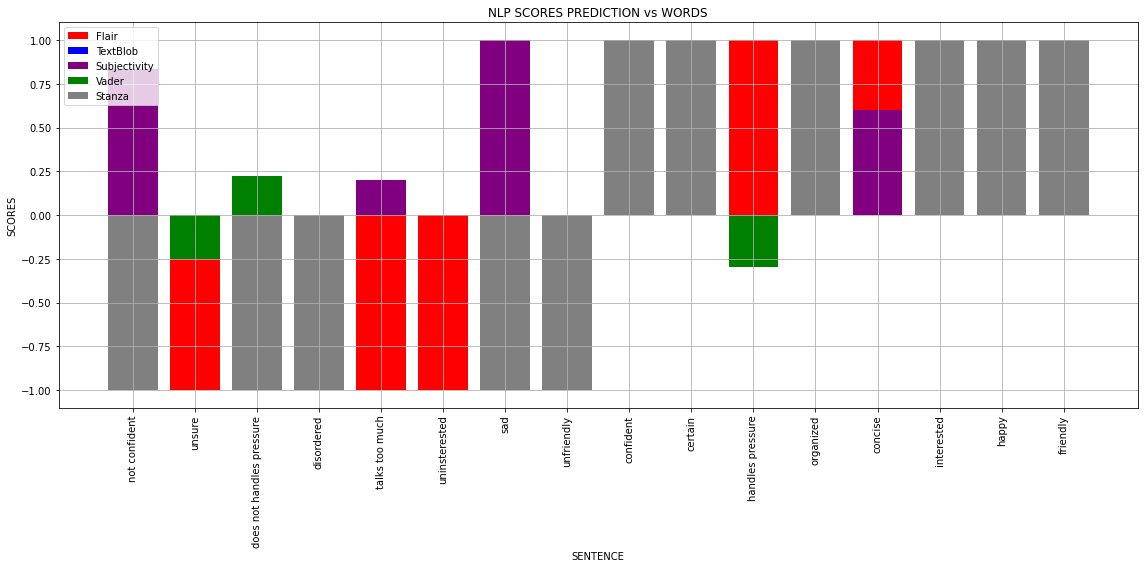

In [40]:
plot_bar(
    p1y=y_flair_values,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_plots,
    size=(16,  8)
)

## **Plotting lines**

In [41]:
def plot_lines(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.plot(x, p1y, linestyle='solid', color='red', label='Flair')
    plt.plot(x, p2y, linestyle='solid', color='blue', label='TextBlob')
    plt.plot(x, p3y, linestyle='dashed', color='purple', label='Subjectivity')
    plt.plot(x, p4y, linestyle='solid', color='green', label='Vader')
    plt.plot(x, p5y, linestyle='solid', color='black', label='Stanza')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('SENTENCE')
    plt.ylabel('SCORES')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

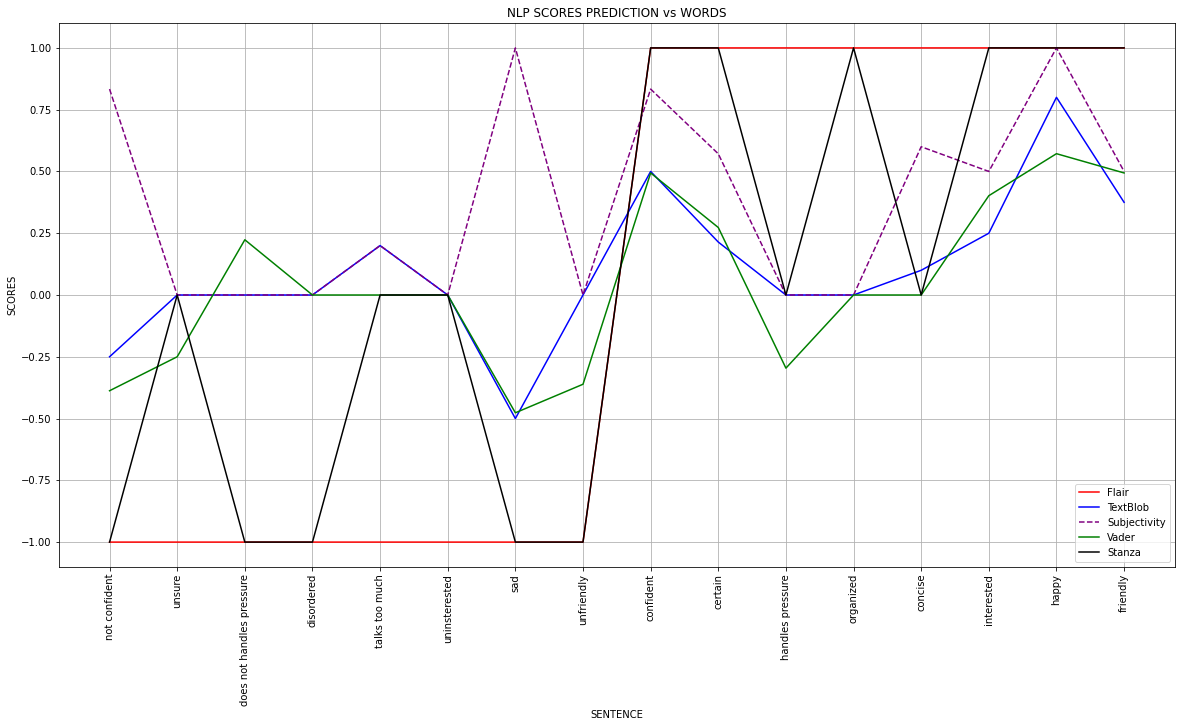

In [42]:
plot_lines(
    p1y=y_flair_values,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_plots,
    size=(20,  10)
)

In [43]:
def plot_flair(x, y):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, linestyle='solid', color='red', label='Flair')
    plt.title('Flair LSTM accuracy')
    plt.xlabel('SENTENCE')
    plt.ylabel('ACCURACY')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

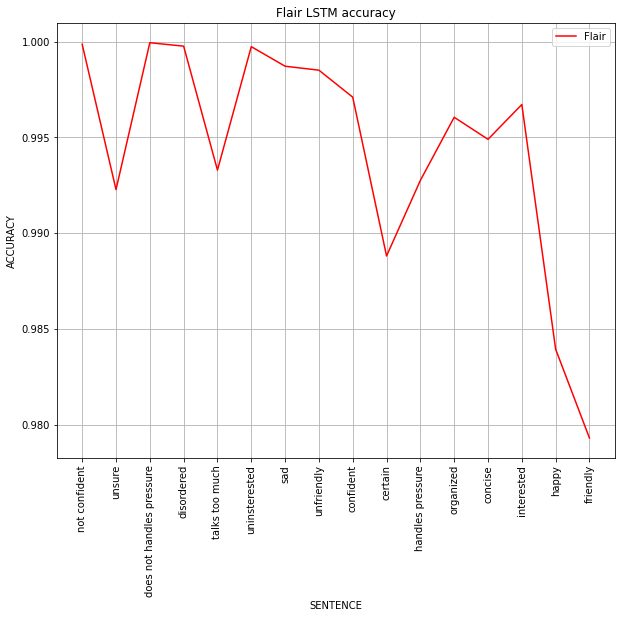

In [44]:
plot_flair(x_plots, y_flair_scores)

---
# **6. Brief positive conclusion**
---

1. **Flair** is great because the properties of the LSTM model: takes into account sequences of letters and words when predicting
2. **TextBlob** subjectivity works great
3. **Vader** & **Stanza (CNN)** are great to detect particular and intense positive or negative words

---

## To-do:
* SpaCy categorization
---

---
# **7. Preprocessing with each word**
---

Words play a central role in language and thought. Several influential factor analysis studies have shown that
the primary dimensions of word meaning are valence, arousal, and dominance (VAD).
- valence is the positive--negative or pleasure--displeasure dimension; 
- arousal is the excited--calm or active--passive dimension; 
- dominance is the powerful--weak or 'have control'--'have no control' dimension.



```
Each line has the following format:
<AffectCategory><tab><term><tab><score>
<AffectCategory> is one of eight emotions (anger, fear, anticipation, trust, surprise, sadness, joy, or disgust).
<term> is a word for which emotion associations are provided.
<score> is a value that indicates the strength of association between the <term> and the <AffectCategory>.
The higher the value, the stronger is the association. Refer to the publications below for details on how the score is calculated.
```



## Loading datasets lexicon

In [45]:
df_NRC_Hashtag = pd.read_csv('./datasets/NRC-Hashtag-Emotion-Lexicon-v0.2.csv', sep='\t')

In [46]:
df_NRC_Emotion_Intensity = pd.read_csv('./datasets/NRC-Emotion-Intensity-Lexicon-v1.csv', sep='\t')

In [47]:
df_NRC_Emotion_Wordlevel = pd.read_csv('./datasets/NRC-Emotion-Lexicon-Wordlevel-v0.92.csv', sep='\t')

In [48]:
# by sentece
df_isear = pd.read_csv('./datasets/isear.csv', sep='|', error_bad_lines=False, usecols=['SIT', 'Field1'])

### Column names and merge (concatenate)

In [49]:
df_NRC_Hashtag.columns = ['category', 'word', 'score']
df_NRC_Emotion_Intensity.columns = ['word', 'category', 'score']
df_NRC_Emotion_Wordlevel.columns = ['word', 'category', 'score']
df_isear.columns = ['category', 'sentence']

In [50]:
df_concat = pd.concat(objs=[df_NRC_Hashtag, df_NRC_Emotion_Intensity, df_NRC_Emotion_Wordlevel], ignore_index=True)

### Sorting concatenated dataset

In [51]:
df_concat = df_concat.sort_values(by=['category'], ascending=True, ignore_index=True)

### Labels lexicon

In [52]:
df_concat_labels = list(set(df_concat.category))

In [53]:
lexicon_labels = list(set(df_NRC_Hashtag.category))
lexicon_labels

['trust',
 'fear',
 'disgust',
 'surprise',
 'anticipation',
 'anger',
 'joy',
 'sadness']

In [54]:
lexicon_labels_isear = list(set(df_isear.category))
lexicon_labels_isear

['disgust', 'fear', 'guilt', 'shame', 'anger', 'joy', 'sadness']

## Loading datasets Valence Arousal Dominance

In [55]:
# by word
df_NRC_VAD_Lexicon = pd.read_csv('./datasets/NRC-VAD-Lexicon.csv', sep='\t')

In [56]:
# by sentence
df_emobank = pd.read_csv('./datasets/emobank.csv', sep=',', usecols=['split', 'text', 'V', 'A', 'D'])

### Column names

In [57]:
df_NRC_VAD_Lexicon.columns = ['word', 'Valence', 'Arousal', 'Dominance']
df_emobank.columns = ['split', 'Valence', 'Arousal', 'Dominance', 'sentece']

## Graphs about categories

In [58]:
x = ['not confident',
 'unsure',
 "can't handle pressure", # have not control
 'disordered',
 'talks to much',
 'uninsterested',
 'sad',
 'unfriendly',
 'confident',
 'certain',
 'can handles pressure', # have control
 'organized',
 'concise',
 'interested',
 'happy',
 'friendly']
xlst = [(lambda i: SIA.polarity_scores(i)['compound'])(i) for i in x]

In [59]:
def simple_plot(x, y):
    plt.figure(figsize=(16, 8))
    plt.plot(x, y, linestyle='solid', color='red')
    plt.xlabel('labels')
    plt.ylabel('scores')
    plt.legend(loc='upper left')
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(b=True)

    plt.show()

No handles with labels found to put in legend.


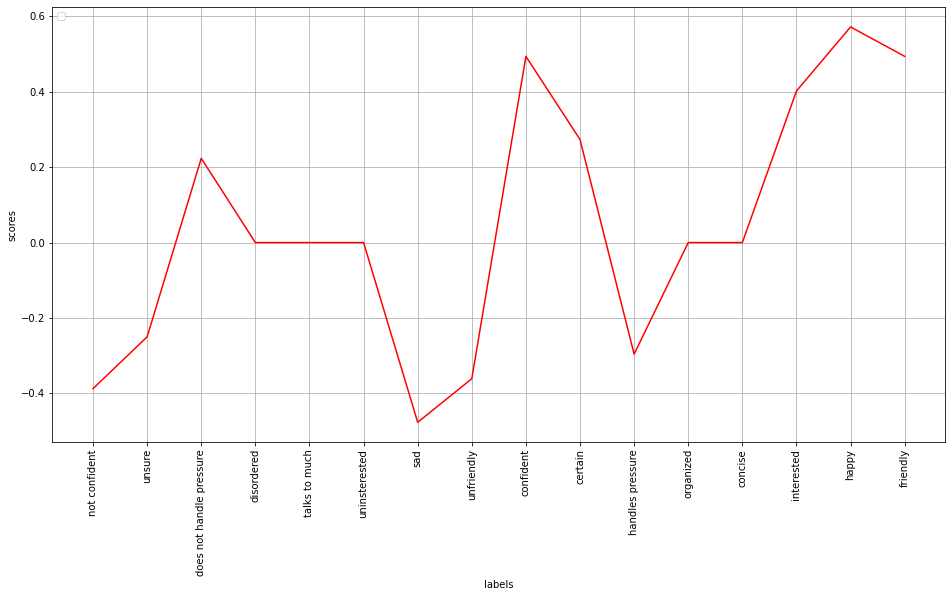

In [60]:
simple_plot(x, xlst)

In [61]:
print(xlst, end=', ')

[-0.3875, -0.25, 0.2235, 0.0, 0.0, 0.0, -0.4767, -0.3612, 0.4939, 0.2732, -0.296, 0.0, 0.0, 0.4019, 0.5719, 0.4939], 

---
# **8. Preprocessing dataframe concatenated**
---

In [62]:
def preprocessing(df, c):
    df[c] = df[c].apply(lambda x: re.sub("[^a-zA-Z]", " ", str(x)))
    df[c] = df[c].str.lower()
    df[c] = df[c].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-zÁ-Úá-ú \t])|(\w+:\/\/\S+)|^rt|http.+?%', '', x))

    return df

In [63]:
df = preprocessing(df_concat, 'word')

## **NLP applying**

In [64]:
def drop_empty_string(df):
    # Warning: An empty Sentence was created!
    # Are there empty strings in your dataset?
    print('removing empty values')
    nan_value = float('NaN')
    df.replace('', nan_value, inplace=True)
    df.replace(' ', nan_value, inplace=True)
    df.replace('  ', nan_value, inplace=True)
    df.dropna(inplace=True)
    return df

def nlp_apply(df, c):
    print('Vader\n')
    df['Compound'] = df[c].apply(lambda x: SIA.polarity_scores(text=x)['compound'])
    
    print('TextBlob\n')
    df['Subjectivity'] = df[c].apply(lambda x: text_blob_subjective(text=x))

    df = drop_empty_string(df)

    print('Stanza\n')
    df['Stanza'] = df[c].apply(lambda x: stanza_funct(text=x))

    df = drop_empty_string(df)

    print('\nFlair\n')
    df['Flair'] = df[c].apply(lambda x: ''.join([i.value for i in flair_lstm(text=x)]))
    
    df = drop_empty_string(df)

    return df

In [ ]:
df = nlp_apply(df, 'word')

Vader

TextBlob

Stanza

{...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {.

In [ ]:
#checkpoint
df = drop_empty_string(df)
df.to_csv('checkpoint-bywords.csv', encoding='utf-8', index=False)

In [ ]:
# flair can complement stanza values
# if stanza value == 0, then assign the prediction from flair
# flair should be a different tokens by predicction
# e.g.: does not handles pressure 
# stanza == 0
# flair == -1
# flar == 0.98 == > -0.98 --> will mean the label {does not handles pressure}

In [ ]:
train_data = df

train_texts = train_data['word'].tolist()
train_cats = train_data['category'].tolist()
final_train_cats = []
cat_dict = {}

def cat_dict_funct(cat_dict, n):
    for i in range(8):
        if i == n:
            cat_dict[lexicon_labels[i]] = 1
        else:
            cat_dict[lexicon_labels[i]] = 0
    

for cat in train_cats: 
    if cat == 'trust':
        cat_dict_funct(cat_dict, 0)
    elif cat == 'fear':
        cat_dict_funct(cat_dict, 1)
    elif cat == 'disgust':
        cat_dict_funct(cat_dict, 2)
    elif cat == 'surprise':
        cat_dict_funct(cat_dict, 3)
    elif cat == 'anticipation':
        cat_dict_funct(cat_dict, 4)
    elif cat == 'anger':
        cat_dict_funct(cat_dict, 5)
    elif cat == 'joy':
        cat_dict_funct(cat_dict, 6)
    else:
        cat_dict_funct(cat_dict, 7)
    final_tran_cats.append(cat_dict)

In [ ]:
training_data = list(zip(train_texts, [{"cats": cats} for cats in final_train_cats]))

In [ ]:
training_data

## **Group by column value**

In [ ]:
group = df.groupby(df.category)

In [ ]:
sadness = group.get_group(lexicon_labels[0])
joy = group.get_group(lexicon_labels[1])
trust = group.get_group(lexicon_labels[2])
anticipation = group.get_group(lexicon_labels[3])
anger = group.get_group(lexicon_labels[4])
surprise = group.get_group(lexicon_labels[5])
fear = group.get_group(lexicon_labels[6])
disgust = group.get_group(lexicon_labels[7])

## **Dropping unnecessary scores**

In [ ]:
sadness.drop(sadness[sadness.score == 0.000000]. index, inplace=True)
joy.drop(joy[joy.score == 0.000000]. index, inplace=True)
trust.drop(trust[trust.score == 0.000000]. index, inplace=True)
anticipation.drop(anticipation[anticipation.score == 0.000000]. index, inplace=True)
anger.drop(anger[anger.score == 0.000000]. index, inplace=True)
surprise.drop(surprise[surprise.score == 0.000000]. index, inplace=True)
fear.drop(fear[fear.score == 0.000000]. index, inplace=True)
disgust.drop(disgust[disgust.score == 0.000000]. index, inplace=True)

In [ ]:
version = '2'
df.to_csv('result.' + version + '.csv', encoding='utf-8', index=False)